# Intro

In this notebook, we will be exploring the IQN algorithm. IQN is a distributional reinforcement learning algorithm that learns the quantile function of the return distribution. This allows us to estimate the full distribution of the return, rather than just the expected value. This can be useful in many applications, such as risk-sensitive control, where we want to take into account the full distribution of the return, rather than just the expected value. Main paper for IQN is [Implicit Quantile Networks for Distributional Reinforcement Learning](https://arxiv.org/abs/1806.06923).

# Quantile Regression
Value Distribution Approximation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def explain_quantiles():
    """
    Demonstrate how quantile computation works with a simple example
    """
    # Create a simple sorted array of returns
    returns = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    
    # Let's compute quantiles for specific tau values
    taus = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
    
    # Manual computation
    print("Manual Quantile Computation:")
    print("-" * 50)
    for tau in taus:
        # Convert tau to position in array
        position = tau * (len(returns) - 1)
        # Get the value at that position
        value = np.percentile(returns, tau * 100)
        print(f"τ = {tau:.2f}:")
        print(f"Position in array = {position:.2f}")
        print(f"Value = {value:.2f}")
        print()

def visualize_quantile_computation():
    """
    Visualize how quantiles are computed from a distribution
    """
    # Create sample returns
    returns = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot 1: Distribution with quantile points
    taus = [0.0, 0.25, 0.5, 0.75, 1.0]
    quantiles = np.percentile(returns, np.array(taus) * 100)
    
    ax1.hist(returns, bins=10, density=True, alpha=0.7)
    for tau, q in zip(taus, quantiles):
        ax1.axvline(q, color='r', linestyle='--', alpha=0.5)
        ax1.text(q, ax1.get_ylim()[1], f'τ={tau:.2f}\nvalue={q:.1f}', 
                rotation=90, va='top')
    
    ax1.set_title('Distribution with Quantile Points')
    ax1.set_xlabel('Return Value')
    ax1.set_ylabel('Density')
    
    # Plot 2: Quantile Function
    taus_continuous = np.linspace(0, 1, 100)
    quantiles_continuous = np.percentile(returns, taus_continuous * 100)
    
    ax2.plot(taus_continuous, quantiles_continuous, 'b-', label='Quantile Function')
    ax2.scatter(taus, quantiles, color='red', s=100, zorder=5, label='Sample Points')
    
    for tau, q in zip(taus, quantiles):
        ax2.text(tau, q + 0.2, f'({tau:.2f}, {q:.1f})', ha='center')
    
    ax2.set_title('Quantile Function (F⁻¹(τ))')
    ax2.set_xlabel('τ')
    ax2.set_ylabel('Return Value')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

def demonstrate_compute_quantile_values():
    """
    Demonstrate how compute_quantile_values works step by step
    """
    # Step 1: Create sample returns
    returns = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    
    # Step 2: Create tau values
    taus = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
    
    # Step 3: Compute quantiles
    quantiles = np.percentile(returns, taus * 100)
    
    print("\nStep-by-step Quantile Computation:")
    print("-" * 50)
    print("Returns array:", returns)
    print("\nFor each tau value:")
    
    for tau, q in zip(taus, quantiles):
        print(f"\nτ = {tau:.2f}")
        print(f"Position = {tau * (len(returns) - 1):.2f}")
        print(f"Quantile value = {q:.2f}")
        print(f"Meaning: {tau*100:.0f}% of values are below {q:.2f}")

# Function from original code for reference
def compute_quantile_values(returns, taus):
    """
    Compute the quantile values for given tau points
    
    Parameters:
    returns: array of values representing the distribution
    taus: array of quantile points (between 0 and 1)
    
    Returns:
    array of values corresponding to each quantile point
    """
    # np.percentile computes the value below which a percentage of observations fall
    # taus * 100 converts from quantile (0-1) to percentage (0-100)
    quantiles = np.percentile(returns, taus * 100)
    return quantiles

if __name__ == "__main__":
    print("Basic Quantile Explanation:")
    explain_quantiles()
    
    print("\nVisualizing Quantile Computation...")
    visualize_quantile_computation()
    
    print("\nDetailed Step-by-Step Example:")
    demonstrate_compute_quantile_values()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def generate_sample_returns():
    """
    Generate sample returns from a mixture of Gaussians to simulate a complex value distribution
    """
    n_samples = 1000
    # Mixture of two Gaussians to create a more interesting distribution
    samples1 = np.random.normal(10, 2, n_samples // 2)
    samples2 = np.random.normal(15, 3, n_samples // 2)
    returns = np.concatenate([samples1, samples2])
    returns.sort()
    return returns

def compute_quantile_values(returns, taus):
    """
    Compute the quantile values for given tau points
    """
    quantiles = np.percentile(returns, taus * 100)
    return quantiles

def visualize_quantile_regression():
    """
    Visualize how different τ values map to return values and construct the distribution
    """
    fig = plt.figure(figsize=(15, 10))
    
    # Generate sample returns
    returns = generate_sample_returns()
    
    # Plot 1: True Return Distribution
    plt.subplot(2, 2, 1)
    sns.histplot(returns, stat='density', kde=True)
    plt.title('True Return Distribution')
    plt.xlabel('Return Value')
    plt.ylabel('Density')
    
    # Plot 2: Quantile Function (Now with τ on y-axis)
    plt.subplot(2, 2, 2)
    taus = np.linspace(0, 1, 1000)
    quantiles = compute_quantile_values(returns, taus)
    
    plt.plot(quantiles, taus, 'b-', label='Quantile Function')  # Swapped axes
    
    # Highlight specific τ points
    highlight_taus = [0.1, 0.25, 0.5, 0.75, 0.9]
    highlight_quantiles = compute_quantile_values(returns, np.array(highlight_taus))
    
    plt.scatter(highlight_quantiles, highlight_taus, c='red', zorder=5)  # Swapped axes
    for tau, q in zip(highlight_taus, highlight_quantiles):
        plt.annotate(f'τ={tau:.2f}', (q, tau), xytext=(10, 0),
                    textcoords='offset points')
    
    plt.title('Quantile Function (F⁻¹(τ))')
    plt.xlabel('Return Value')
    plt.ylabel('τ')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: IQN Sampling Process
    plt.subplot(2, 2, 3)
    n_samples = 50
    sampled_taus = np.random.uniform(0, 1, n_samples)
    sampled_quantiles = compute_quantile_values(returns, sampled_taus)
    
    plt.scatter(sampled_quantiles, sampled_taus, alpha=0.6, label='Sampled Points')  # Swapped axes
    plt.plot(quantiles, taus, 'b-', alpha=0.3, label='Quantile Function')  # Swapped axes
    
    plt.title(f'IQN Sampling Process (n={n_samples} samples)')
    plt.xlabel('Return Value')
    plt.ylabel('τ (Random Samples)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Reconstructed Distribution from Samples
    plt.subplot(2, 2, 4)
    
    n_samples_reconstruction = 1000
    sampled_taus_reconstruction = np.random.uniform(0, 1, n_samples_reconstruction)
    sampled_quantiles_reconstruction = compute_quantile_values(returns, sampled_taus_reconstruction)
    
    sns.histplot(sampled_quantiles_reconstruction, stat='density', kde=True, 
                label='Reconstructed', color='green', alpha=0.5)
    sns.histplot(returns, stat='density', kde=True, 
                label='Original', color='blue', alpha=0.5)
    
    plt.title('Original vs Reconstructed Distribution')
    plt.xlabel('Return Value')
    plt.ylabel('Density')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def visualize_risk_sensitive_sampling():
    """
    Visualize how risk-sensitive sampling affects the reconstructed distribution
    """
    returns = generate_sample_returns()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    risk_levels = [1.0, 0.5, 0.2, 0.1]  # Different CVaR levels
    
    for idx, alpha in enumerate(risk_levels):
        ax = axes[idx//2, idx%2]
        
        # Generate risk-sensitive samples
        n_samples = 1000
        sampled_taus = np.random.uniform(0, alpha, n_samples)  # Risk-sensitive sampling
        sampled_quantiles = compute_quantile_values(returns, sampled_taus)
        
        # Plot reconstructed distribution
        sns.histplot(data=sampled_quantiles, stat='density', kde=True, 
                    color='red', alpha=0.5, ax=ax, label='Risk-Sensitive')
        sns.histplot(data=returns, stat='density', kde=True,
                    color='blue', alpha=0.5, ax=ax, label='Original')
        
        ax.set_title(f'CVaR (α={alpha})')
        ax.set_xlabel('Return Value')
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

def visualize_iqn_approximation():
    """
    Visualize how IQN approximates the quantile function
    """
    returns = generate_sample_returns()
    taus = np.linspace(0, 1, 1000)
    true_quantiles = compute_quantile_values(returns, taus)
    
    sample_sizes = [10, 50, 200, 1000]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for idx, n_samples in enumerate(sample_sizes):
        ax = axes[idx//2, idx%2]
        
        # Generate samples
        sampled_taus = np.random.uniform(0, 1, n_samples)
        sampled_taus.sort()
        sampled_quantiles = compute_quantile_values(returns, sampled_taus)
        
        # Plot with swapped axes
        ax.plot(true_quantiles, taus, 'b-', alpha=0.5, label='True Quantile Function')
        ax.scatter(sampled_quantiles, sampled_taus, c='red', alpha=0.6, 
                  s=20, label='IQN Samples')
        
        ax.set_title(f'IQN Approximation (n={n_samples} samples)')
        ax.set_xlabel('Return Value')
        ax.set_ylabel('τ')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plt.style.use('seaborn')
    
    print("Generating visualizations...")
    visualize_quantile_regression()
    visualize_risk_sensitive_sampling()
    visualize_iqn_approximation()
    print("Done!")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def demonstrate_distribution_reconstruction():
    """
    Demonstrate how we reconstruct a distribution using quantile regression
    """
    # 1. Generate original distribution (let's use a mixture of Gaussians)
    n_samples = 1000
    original_dist = np.concatenate([
        np.random.normal(10, 2, n_samples // 2),
        np.random.normal(15, 3, n_samples // 2)
    ])
    
    plt.figure(figsize=(15, 10))
    
    # Step 1: Show original distribution
    plt.subplot(2, 2, 1)
    sns.histplot(original_dist, stat='density', kde=True, color='blue', label='Original')
    plt.title('Step 1: Original Distribution')
    plt.xlabel('Return Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Step 2: Show quantile function
    plt.subplot(2, 2, 2)
    taus = np.linspace(0, 1, 1000)
    quantiles = np.percentile(original_dist, taus * 100)
    plt.plot(quantiles, taus, 'b-')
    plt.title('Step 2: Quantile Function')
    plt.xlabel('Return Value')
    plt.ylabel('τ')
    plt.grid(True)
    
    # Step 3: Show uniform sampling of taus
    plt.subplot(2, 2, 3)
    sampled_taus = np.random.uniform(0, 1, 1000)
    plt.hist(sampled_taus, bins=50, density=True)
    plt.title('Step 3: Uniform Sampling of τ')
    plt.xlabel('τ')
    plt.ylabel('Density')
    
    # Step 4: Show reconstruction process
    plt.subplot(2, 2, 4)
    # Get return values corresponding to sampled taus
    reconstructed_values = np.percentile(original_dist, sampled_taus * 100)
    
    # Plot both distributions
    sns.histplot(original_dist, stat='density', kde=True, 
                color='blue', alpha=0.5, label='Original')
    sns.histplot(reconstructed_values, stat='density', kde=True, 
                color='green', alpha=0.5, label='Reconstructed')
    
    plt.title('Step 4: Distribution Reconstruction')
    plt.xlabel('Return Value')
    plt.ylabel('Density')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Let's also show the process with different sample sizes
def show_reconstruction_quality():
    """
    Show how sample size affects reconstruction quality
    """
    # Generate original distribution
    n_samples = 1000
    original_dist = np.concatenate([
        np.random.normal(10, 2, n_samples // 2),
        np.random.normal(15, 3, n_samples // 2)
    ])
    
    sample_sizes = [10, 100, 1000, 10000]
    
    plt.figure(figsize=(15, 10))
    
    for i, n in enumerate(sample_sizes):
        plt.subplot(2, 2, i+1)
        
        # Sample taus and get corresponding values
        sampled_taus = np.random.uniform(0, 1, n)
        reconstructed_values = np.percentile(original_dist, sampled_taus * 100)
        
        # Plot
        sns.histplot(original_dist, stat='density', kde=True, 
                    color='blue', alpha=0.5, label='Original')
        sns.histplot(reconstructed_values, stat='density', kde=True, 
                    color='green', alpha=0.5, label='Reconstructed')
        
        plt.title(f'Reconstruction with {n} samples')
        plt.xlabel('Return Value')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Demonstrating distribution reconstruction process...")
    demonstrate_distribution_reconstruction()
    print("\nShowing effect of sample size on reconstruction quality...")
    show_reconstruction_quality()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def explain_risk_sensitive_sampling():
    """
    Detailed explanation of risk-sensitive sampling with CVaR
    """
    # Generate our value distribution
    n_samples = 1000
    returns = np.concatenate([
        np.random.normal(10, 2, n_samples // 2),  # Some returns around 10
        np.random.normal(15, 3, n_samples // 2)   # Some returns around 15
    ])
    
    # Create figure with three rows
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    
    # Row 1: Show tau sampling for different alpha values
    alphas = [1.0, 0.5, 0.2, 0.1]
    colors = ['blue', 'green', 'orange', 'red']
    
    # Plot 1: Show different tau sampling distributions
    ax = axes[0, 0]
    for alpha, color in zip(alphas, colors):
        taus = np.random.uniform(0, alpha, 1000)
        sns.kdeplot(data=taus, ax=ax, color=color, label=f'α={alpha}')
    
    ax.set_title('Tau Sampling Distributions for Different α')
    ax.set_xlabel('τ')
    ax.set_ylabel('Density')
    ax.legend()
    
    # Plot 2: Show quantile function
    ax = axes[0, 1]
    taus = np.linspace(0, 1, 1000)
    quantiles = np.percentile(returns, taus * 100)
    
    ax.plot(quantiles, taus, 'b-', label='Quantile Function')
    # Highlight different alpha regions
    for alpha, color in zip(alphas, colors):
        ax.axhline(y=alpha, color=color, linestyle='--', alpha=0.5)
        ax.fill_between(quantiles, 0, alpha, color=color, alpha=0.1)
    
    ax.set_title('Quantile Function with Different α Regions')
    ax.set_xlabel('Return Value')
    ax.set_ylabel('τ')
    ax.grid(True)
    
    # Row 2 & 3: Show resulting distributions for each alpha
    for idx, alpha in enumerate(alphas):
        ax = axes[(idx//2)+1, idx%2]
        
        # Generate risk-sensitive samples
        sampled_taus = np.random.uniform(0, alpha, 1000)
        sampled_returns = np.percentile(returns, sampled_taus * 100)
        
        # Plot original and risk-sensitive distributions
        sns.histplot(data=returns, stat='density', kde=True,
                    color='blue', alpha=0.3, ax=ax, label='Original')
        sns.histplot(data=sampled_returns, stat='density', kde=True,
                    color='red', alpha=0.3, ax=ax, label='Risk-Sensitive')
        
        # Add vertical lines for means
        ax.axvline(np.mean(returns), color='blue', linestyle='--', label='Original Mean')
        ax.axvline(np.mean(sampled_returns), color='red', linestyle='--', label='Risk-Sensitive Mean')
        
        ax.set_title(f'Distribution with α={alpha}')
        ax.set_xlabel('Return Value')
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)
    explain_risk_sensitive_sampling()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def visualize_cvar_mean_effect():
    """
    Visualize how CVaR affects mean calculation by considering different areas under the curve
    """
    # Create a skewed distribution for better visualization
    n_samples = 10000
    returns = np.concatenate([
        np.random.normal(10, 2, n_samples // 2),
        np.random.normal(15, 3, n_samples // 2)
    ])
    
    # Create figure with subplots for different alpha values
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    alphas = [1.0, 0.5, 0.2, 0.1]  # Different CVaR levels
    
    # Calculate distribution parameters for plotting
    x = np.linspace(min(returns), max(returns), 1000)
    kde = stats.gaussian_kde(returns)
    y = kde(x)
    
    for idx, alpha in enumerate(alphas):
        ax = axes[idx//2, idx%2]
        
        # Plot full distribution
        ax.plot(x, y, 'b-', label='Full Distribution')
        
        # Calculate VaR (value at risk) for the given alpha
        var = np.percentile(returns, alpha * 100)
        
        # Calculate CVaR (mean of values below VaR)
        cvar_values = returns[returns <= var]
        cvar_mean = np.mean(cvar_values)
        
        # Fill the area considered by CVaR
        x_fill = x[x <= var]
        y_fill = y[x <= var]
        ax.fill_between(x_fill, y_fill, color='red', alpha=0.3, 
                       label=f'Area considered by CVaR (α={alpha})')
        
        # Plot means
        ax.axvline(np.mean(returns), color='blue', linestyle='--', 
                  label='Full Distribution Mean')
        ax.axvline(cvar_mean, color='red', linestyle='--', 
                  label='CVaR Mean')
        
        # Add text annotations
        ax.text(0.02, 0.98, f'Full Mean: {np.mean(returns):.2f}\nCVaR Mean: {cvar_mean:.2f}', 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        ax.set_title(f'CVaR with α={alpha}')
        ax.set_xlabel('Return Value')
        ax.set_ylabel('Density')
        ax.legend()
        
        # Add VaR line
        ax.axvline(var, color='green', linestyle=':', label='VaR')
        
    plt.tight_layout()
    plt.show()

def visualize_cvar_distribution_comparison():
    """
    Compare original distribution with CVaR-focused distribution
    """
    # Generate distribution
    n_samples = 10000
    returns = np.concatenate([
        np.random.normal(10, 2, n_samples // 2),
        np.random.normal(15, 3, n_samples // 2)
    ])
    
    plt.figure(figsize=(15, 6))
    
    # Plot 1: Show how CVaR considers different portions
    plt.subplot(1, 2, 1)
    x = np.linspace(min(returns), max(returns), 1000)
    kde = stats.gaussian_kde(returns)
    y = kde(x)
    
    plt.plot(x, y, 'b-', label='Full Distribution')
    
    # Show different CVaR regions
    alphas = [0.1, 0.2, 0.5, 1.0]
    colors = ['red', 'orange', 'green', 'blue']
    
    for alpha, color in zip(alphas, colors):
        var = np.percentile(returns, alpha * 100)
        cvar_values = returns[returns <= var]
        cvar_mean = np.mean(cvar_values)
        
        # Mark VaR points
        plt.axvline(var, color=color, linestyle=':', alpha=0.5)
        # Mark CVaR means
        plt.axvline(cvar_mean, color=color, linestyle='--', 
                   label=f'CVaR Mean (α={alpha})')
    
    plt.title('CVaR Means for Different α Values')
    plt.xlabel('Return Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Plot 2: Show progressive mean shift
    plt.subplot(1, 2, 2)
    alphas = np.linspace(0.01, 1, 100)
    cvar_means = []
    
    for alpha in alphas:
        var = np.percentile(returns, alpha * 100)
        cvar_values = returns[returns <= var]
        cvar_means.append(np.mean(cvar_values))
    
    plt.plot(alphas, cvar_means, 'b-', label='CVaR Mean')
    plt.axhline(np.mean(returns), color='r', linestyle='--', 
                label='Full Distribution Mean')
    
    plt.title('CVaR Mean vs α')
    plt.xlabel('α')
    plt.ylabel('Mean Value')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)
    print("Visualizing CVaR effect on mean calculation...")
    visualize_cvar_mean_effect()
    print("\nComparing CVaR distributions...")
    visualize_cvar_distribution_comparison()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def generate_action_value_distributions():
    """
    Generate two different value distributions representing two actions
    Action 1: Lower mean, lower variance (safer action)
    Action 2: Higher mean, higher variance (riskier action)
    """
    n_samples = 1000
    
    # Action 1: More conservative action (mean=10, std=2)
    action1_values = np.random.normal(10, 2, n_samples)
    
    # Action 2: Riskier action with higher potential return (mixture of distributions)
    action2_values = np.concatenate([
        np.random.normal(8, 2, n_samples // 2),    # Some bad outcomes
        np.random.normal(15, 3, n_samples // 2)    # Some very good outcomes
    ])
    
    return action1_values, action2_values

def compute_cvar_mean(values, alpha):
    """
    Compute CVaR mean for given values and alpha
    """
    var = np.percentile(values, alpha * 100)
    cvar_values = values[values <= var]
    return np.mean(cvar_values)

def visualize_action_selection():
    """
    Visualize how different CVaR levels affect action selection
    """
    # Generate value distributions for two actions
    action1_values, action2_values = generate_action_value_distributions()
    
    # Set up the plot
    fig = plt.figure(figsize=(20, 12))
    alphas = [1.0, 0.5, 0.1]
    
    # Plot 1: Show both full distributions
    plt.subplot(2, 2, 1)
    x = np.linspace(min(min(action1_values), min(action2_values)),
                    max(max(action1_values), max(action2_values)), 1000)
    
    kde1 = stats.gaussian_kde(action1_values)
    kde2 = stats.gaussian_kde(action2_values)
    
    plt.plot(x, kde1(x), 'b-', label='Action 1 (Safe)')
    plt.plot(x, kde2(x), 'r-', label='Action 2 (Risky)')
    
    plt.title('Value Distributions for Both Actions')
    plt.xlabel('Return Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Plot decision process for each alpha
    for idx, alpha in enumerate(alphas):
        plt.subplot(2, 2, idx + 2)
        
        # Plot distributions
        plt.plot(x, kde1(x), 'b-', alpha=0.5, label='Action 1 (Safe)')
        plt.plot(x, kde2(x), 'r-', alpha=0.5, label='Action 2 (Risky)')
        
        # Compute VaR and CVaR for both actions
        var1 = np.percentile(action1_values, alpha * 100)
        var2 = np.percentile(action2_values, alpha * 100)
        
        cvar_mean1 = compute_cvar_mean(action1_values, alpha)
        cvar_mean2 = compute_cvar_mean(action2_values, alpha)
        
        # Fill CVaR areas
        x1_fill = x[x <= var1]
        x2_fill = x[x <= var2]
        plt.fill_between(x1_fill, kde1(x1_fill), alpha=0.3, color='blue',
                        label=f'Action 1 CVaR Area')
        plt.fill_between(x2_fill, kde2(x2_fill), alpha=0.3, color='red',
                        label=f'Action 2 CVaR Area')
        
        # Plot CVaR means
        plt.axvline(cvar_mean1, color='blue', linestyle='--', 
                   label=f'Action 1 CVaR Mean: {cvar_mean1:.2f}')
        plt.axvline(cvar_mean2, color='red', linestyle='--',
                   label=f'Action 2 CVaR Mean: {cvar_mean2:.2f}')
        
        # Determine selected action
        selected_action = 1 if cvar_mean1 > cvar_mean2 else 2
        
        plt.title(f'Action Selection with α={alpha}\n' + 
                 f'Selected Action: {selected_action}')
        plt.xlabel('Return Value')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

def show_action_selection_process():
    """
    Show detailed decision process for different alpha values
    """
    action1_values, action2_values = generate_action_value_distributions()
    alphas = np.linspace(0.01, 1, 100)
    
    # Compute CVaR means for different alphas
    cvar_means1 = []
    cvar_means2 = []
    for alpha in alphas:
        cvar_means1.append(compute_cvar_mean(action1_values, alpha))
        cvar_means2.append(compute_cvar_mean(action2_values, alpha))
    
    plt.figure(figsize=(15, 6))
    
    # Plot CVaR means vs alpha
    plt.plot(alphas, cvar_means1, 'b-', label='Action 1 (Safe)')
    plt.plot(alphas, cvar_means2, 'r-', label='Action 2 (Risky)')
    
    # Add crossover point
    crossover_idx = np.argmin(np.abs(np.array(cvar_means1) - np.array(cvar_means2)))
    crossover_alpha = alphas[crossover_idx]
    
    plt.axvline(crossover_alpha, color='green', linestyle='--',
                label=f'Crossover Point (α={crossover_alpha:.2f})')
    
    # Highlight decision regions
    plt.fill_between(alphas, cvar_means1, cvar_means2, 
                    where=(np.array(cvar_means1) > np.array(cvar_means2)),
                    color='blue', alpha=0.2, label='Choose Action 1')
    plt.fill_between(alphas, cvar_means1, cvar_means2,
                    where=(np.array(cvar_means1) <= np.array(cvar_means2)),
                    color='red', alpha=0.2, label='Choose Action 2')
    
    plt.title('Action Selection vs α')
    plt.xlabel('α')
    plt.ylabel('CVaR Mean')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)
    print("Visualizing action selection process...")
    visualize_action_selection()
    print("\nShowing detailed decision process...")
    show_action_selection_process()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def generate_three_action_distributions():
    """
    Generate three different value distributions representing different action types:
    Action 1: Conservative (low risk, low return)
    Action 2: Moderate (medium risk, medium return)
    Action 3: Aggressive (high risk, high potential return)
    """
    n_samples = 1000
    
    # Action 1: Conservative action (stable, low variance)
    action1_values = np.random.normal(10, 1.5, n_samples)
    
    # Action 2: Moderate action (medium risk/reward)
    action2_values = np.random.normal(12, 2.5, n_samples)
    
    # Action 3: Aggressive action (high risk/reward)
    action3_values = np.concatenate([
        np.random.normal(7, 2, n_samples // 3),    # Bad outcomes
        np.random.normal(15, 2, n_samples // 3),   # Medium outcomes
        np.random.normal(18, 3, n_samples // 3)    # Good outcomes
    ])
    
    return action1_values, action2_values, action3_values

def compute_cvar_mean(values, alpha):
    """
    Compute CVaR mean for given values and alpha
    """
    var = np.percentile(values, alpha * 100)
    cvar_values = values[values <= var]
    return np.mean(cvar_values)

def visualize_action_selection():
    """
    Visualize how different CVaR levels affect action selection among three actions
    """
    # Generate value distributions
    action1_values, action2_values, action3_values = generate_three_action_distributions()
    
    # Setup plot
    fig = plt.figure(figsize=(20, 15))
    alphas = [0.1, 0.3, 0.5, 0.7, 1.0]
    
    # Plot 1: Show all full distributions
    plt.subplot(3, 2, 1)
    x = np.linspace(min(min(action1_values), min(action2_values), min(action3_values)),
                    max(max(action1_values), max(action2_values), max(action3_values)), 1000)
    
    kde1 = stats.gaussian_kde(action1_values)
    kde2 = stats.gaussian_kde(action2_values)
    kde3 = stats.gaussian_kde(action3_values)
    
    plt.plot(x, kde1(x), 'b-', label='Action 1 (Conservative)')
    plt.plot(x, kde2(x), 'g-', label='Action 2 (Moderate)')
    plt.plot(x, kde3(x), 'r-', label='Action 3 (Aggressive)')
    
    # Add means to the plot
    plt.axvline(np.mean(action1_values), color='b', linestyle='--', alpha=0.5)
    plt.axvline(np.mean(action2_values), color='g', linestyle='--', alpha=0.5)
    plt.axvline(np.mean(action3_values), color='r', linestyle='--', alpha=0.5)
    
    plt.title('Full Value Distributions for All Actions')
    plt.xlabel('Return Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Plot decision process for each alpha
    for idx, alpha in enumerate(alphas):
        plt.subplot(3, 2, idx + 2)
        
        # Plot distributions
        plt.plot(x, kde1(x), 'b-', alpha=0.5, label='Action 1 (Conservative)')
        plt.plot(x, kde2(x), 'g-', alpha=0.5, label='Action 2 (Moderate)')
        plt.plot(x, kde3(x), 'r-', alpha=0.5, label='Action 3 (Aggressive)')
        
        # Compute VaR and CVaR for all actions
        var1 = np.percentile(action1_values, alpha * 100)
        var2 = np.percentile(action2_values, alpha * 100)
        var3 = np.percentile(action3_values, alpha * 100)
        
        cvar_mean1 = compute_cvar_mean(action1_values, alpha)
        cvar_mean2 = compute_cvar_mean(action2_values, alpha)
        cvar_mean3 = compute_cvar_mean(action3_values, alpha)
        
        # Fill CVaR areas
        x1_fill = x[x <= var1]
        x2_fill = x[x <= var2]
        x3_fill = x[x <= var3]
        
        plt.fill_between(x1_fill, kde1(x1_fill), alpha=0.3, color='blue')
        plt.fill_between(x2_fill, kde2(x2_fill), alpha=0.3, color='green')
        plt.fill_between(x3_fill, kde3(x3_fill), alpha=0.3, color='red')
        
        # Plot CVaR means
        plt.axvline(cvar_mean1, color='blue', linestyle='--', 
                   label=f'Action 1 CVaR: {cvar_mean1:.2f}')
        plt.axvline(cvar_mean2, color='green', linestyle='--',
                   label=f'Action 2 CVaR: {cvar_mean2:.2f}')
        plt.axvline(cvar_mean3, color='red', linestyle='--',
                   label=f'Action 3 CVaR: {cvar_mean3:.2f}')
        
        # Determine selected action
        cvar_means = [cvar_mean1, cvar_mean2, cvar_mean3]
        selected_action = np.argmax(cvar_means) + 1
        
        plt.title(f'Action Selection with α={alpha}\n' + 
                 f'Selected Action: {selected_action}')
        plt.xlabel('Return Value')
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

def show_action_preferences():
    """
    Show how action preferences change across alpha values
    """
    action1_values, action2_values, action3_values = generate_three_action_distributions()
    alphas = np.linspace(0.01, 1, 100)
    
    # Compute CVaR means across alpha values
    cvar_means1 = []
    cvar_means2 = []
    cvar_means3 = []
    
    for alpha in alphas:
        cvar_means1.append(compute_cvar_mean(action1_values, alpha))
        cvar_means2.append(compute_cvar_mean(action2_values, alpha))
        cvar_means3.append(compute_cvar_mean(action3_values, alpha))
    
    plt.figure(figsize=(15, 6))
    
    # Plot CVaR means vs alpha
    plt.plot(alphas, cvar_means1, 'b-', label='Action 1 (Conservative)')
    plt.plot(alphas, cvar_means2, 'g-', label='Action 2 (Moderate)')
    plt.plot(alphas, cvar_means3, 'r-', label='Action 3 (Aggressive)')
    
    # Highlight optimal action regions
    preferred_actions = np.argmax([cvar_means1, cvar_means2, cvar_means3], axis=0) + 1
    
    # Add specific alpha points
    highlight_alphas = [0.1, 0.3, 0.5, 0.7, 1.0]
    for alpha in highlight_alphas:
        idx = np.abs(alphas - alpha).argmin()
        values = [cvar_means1[idx], cvar_means2[idx], cvar_means3[idx]]
        best_action = np.argmax(values) + 1
        plt.plot(alpha, max(values), 'ko')
        plt.text(alpha, max(values), f'α={alpha}\nAction {best_action}',
                verticalalignment='bottom')
    
    plt.title('CVaR Means vs α for All Actions')
    plt.xlabel('α')
    plt.ylabel('CVaR Mean')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)
    print("Visualizing action selection process...")
    visualize_action_selection()
    print("\nShowing action preferences across alpha values...")
    show_action_preferences()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calculate_alpha_cvar(S, method='linear'):
    """
    Calculate αCVaR based on similarity using different decay methods
    """
    S_min, S_max = 0.2, 0.95
    alpha_start, alpha_min = 1.0, 0.1
    
    if method == 'linear':
        return alpha_start + (alpha_min - alpha_start) * ((S - S_min)/(S_max - S_min))
    elif method == 'exponential':
        return np.exp(np.log(alpha_min/alpha_start)/(S_max - S_min)*(S - S_min)) * alpha_start
    elif method == 'concave':
        return alpha_start - S**2 * (alpha_start - alpha_min)

def demonstrate_exploration_benefit():
    """
    Demonstrate why adaptive CVaR is beneficial at different exploration stages
    """
    fig = plt.figure(figsize=(20, 12))
    
    # Plot 1: Show αCVaR decay for different methods
    plt.subplot(2, 2, 1)
    S = np.linspace(0.2, 0.95, 1000)
    
    methods = ['linear', 'exponential', 'concave']
    labels = ['Linear Decrease', 'Exponential Decay', 'Concave Exponential']
    colors = ['blue', 'red', 'green']
    
    for method, label, color in zip(methods, labels, colors):
        alpha_cvar = [calculate_alpha_cvar(s, method) for s in S]
        plt.plot(S, alpha_cvar, label=label, color=color)
    
    plt.title('αCVaR Decay with Exploration Progress')
    plt.xlabel('Similarity (S)')
    plt.ylabel('αCVaR')
    plt.grid(True)
    plt.legend()
    
    # Plot 2: Show example value distributions at different exploration stages
    plt.subplot(2, 2, 2)
    
    # Generate example distributions for different exploration stages
    x = np.linspace(0, 20, 1000)
    
    # Early stage: High variance, potential for high rewards
    early_dist = stats.norm.pdf(x, 12, 4)
    # Mid stage: Medium variance
    mid_dist = stats.norm.pdf(x, 10, 2.5)
    # Late stage: Low variance, more certain outcomes
    late_dist = stats.norm.pdf(x, 8, 1.5)
    
    plt.plot(x, early_dist, 'b-', label='Early Stage (S≈0.2)')
    plt.plot(x, mid_dist, 'g-', label='Mid Stage (S≈0.6)')
    plt.plot(x, late_dist, 'r-', label='Late Stage (S≈0.9)')
    
    plt.title('Value Distributions at Different Exploration Stages')
    plt.xlabel('Return Value')
    plt.ylabel('Density')
    plt.legend()
    
    # Plot 3: Show risk-return tradeoff
    plt.subplot(2, 2, 3)
    
    # Generate exploration data
    similarities = [0.2, 0.6, 0.9]
    variances = [4, 2.5, 1.5]
    means = [12, 10, 8]
    
    plt.scatter(variances, means, c=['blue', 'green', 'red'], s=100)
    for i, s in enumerate(similarities):
        plt.annotate(f'S={s}', (variances[i], means[i]))
    
    plt.title('Risk-Return Tradeoff During Exploration')
    plt.xlabel('Risk (Variance)')
    plt.ylabel('Expected Return')
    
    # Plot 4: Show effective exploration rate
    plt.subplot(2, 2, 4)
    
    S = np.linspace(0.2, 0.95, 1000)
    unexplored = 1 - S
    
    for method, label, color in zip(methods, labels, colors):
        alpha_cvar = [calculate_alpha_cvar(s, method) for s in S]
        effective_rate = np.array(alpha_cvar) * unexplored
        plt.plot(S, effective_rate, label=label, color=color)
    
    plt.title('Effective Exploration Rate\n(αCVaR × Unexplored Area)')
    plt.xlabel('Similarity (S)')
    plt.ylabel('Effective Rate')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def show_mathematical_justification():
    """
    Demonstrate the mathematical reasoning behind the adaptive strategy
    """
    plt.figure(figsize=(15, 6))
    
    # Plot expected value vs CVaR for different stages
    S_values = [0.2, 0.6, 0.9]
    alphas = np.linspace(0.1, 1, 1000)
    
    for idx, S in enumerate(S_values):
        # Generate stage-specific distribution
        if S <= 0.3:  # Early stage
            values = np.random.normal(12, 4, 10000)
        elif S <= 0.7:  # Mid stage
            values = np.random.normal(10, 2.5, 10000)
        else:  # Late stage
            values = np.random.normal(8, 1.5, 10000)
        
        cvar_values = []
        for alpha in alphas:
            cvar = np.mean(values[values <= np.percentile(values, alpha * 100)])
            cvar_values.append(cvar)
        
        plt.plot(alphas, cvar_values, 
                label=f'S={S} ({"Early" if S<=0.3 else "Mid" if S<=0.7 else "Late"} Stage)')
    
    plt.title('CVaR Values Across Exploration Stages')
    plt.xlabel('α')
    plt.ylabel('CVaR Value')
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)
    print("Demonstrating adaptive CVaR benefits...")
    demonstrate_exploration_benefit()
    print("\nShowing mathematical justification...")
    show_mathematical_justification()

Visualizing CVaR calculation methods...


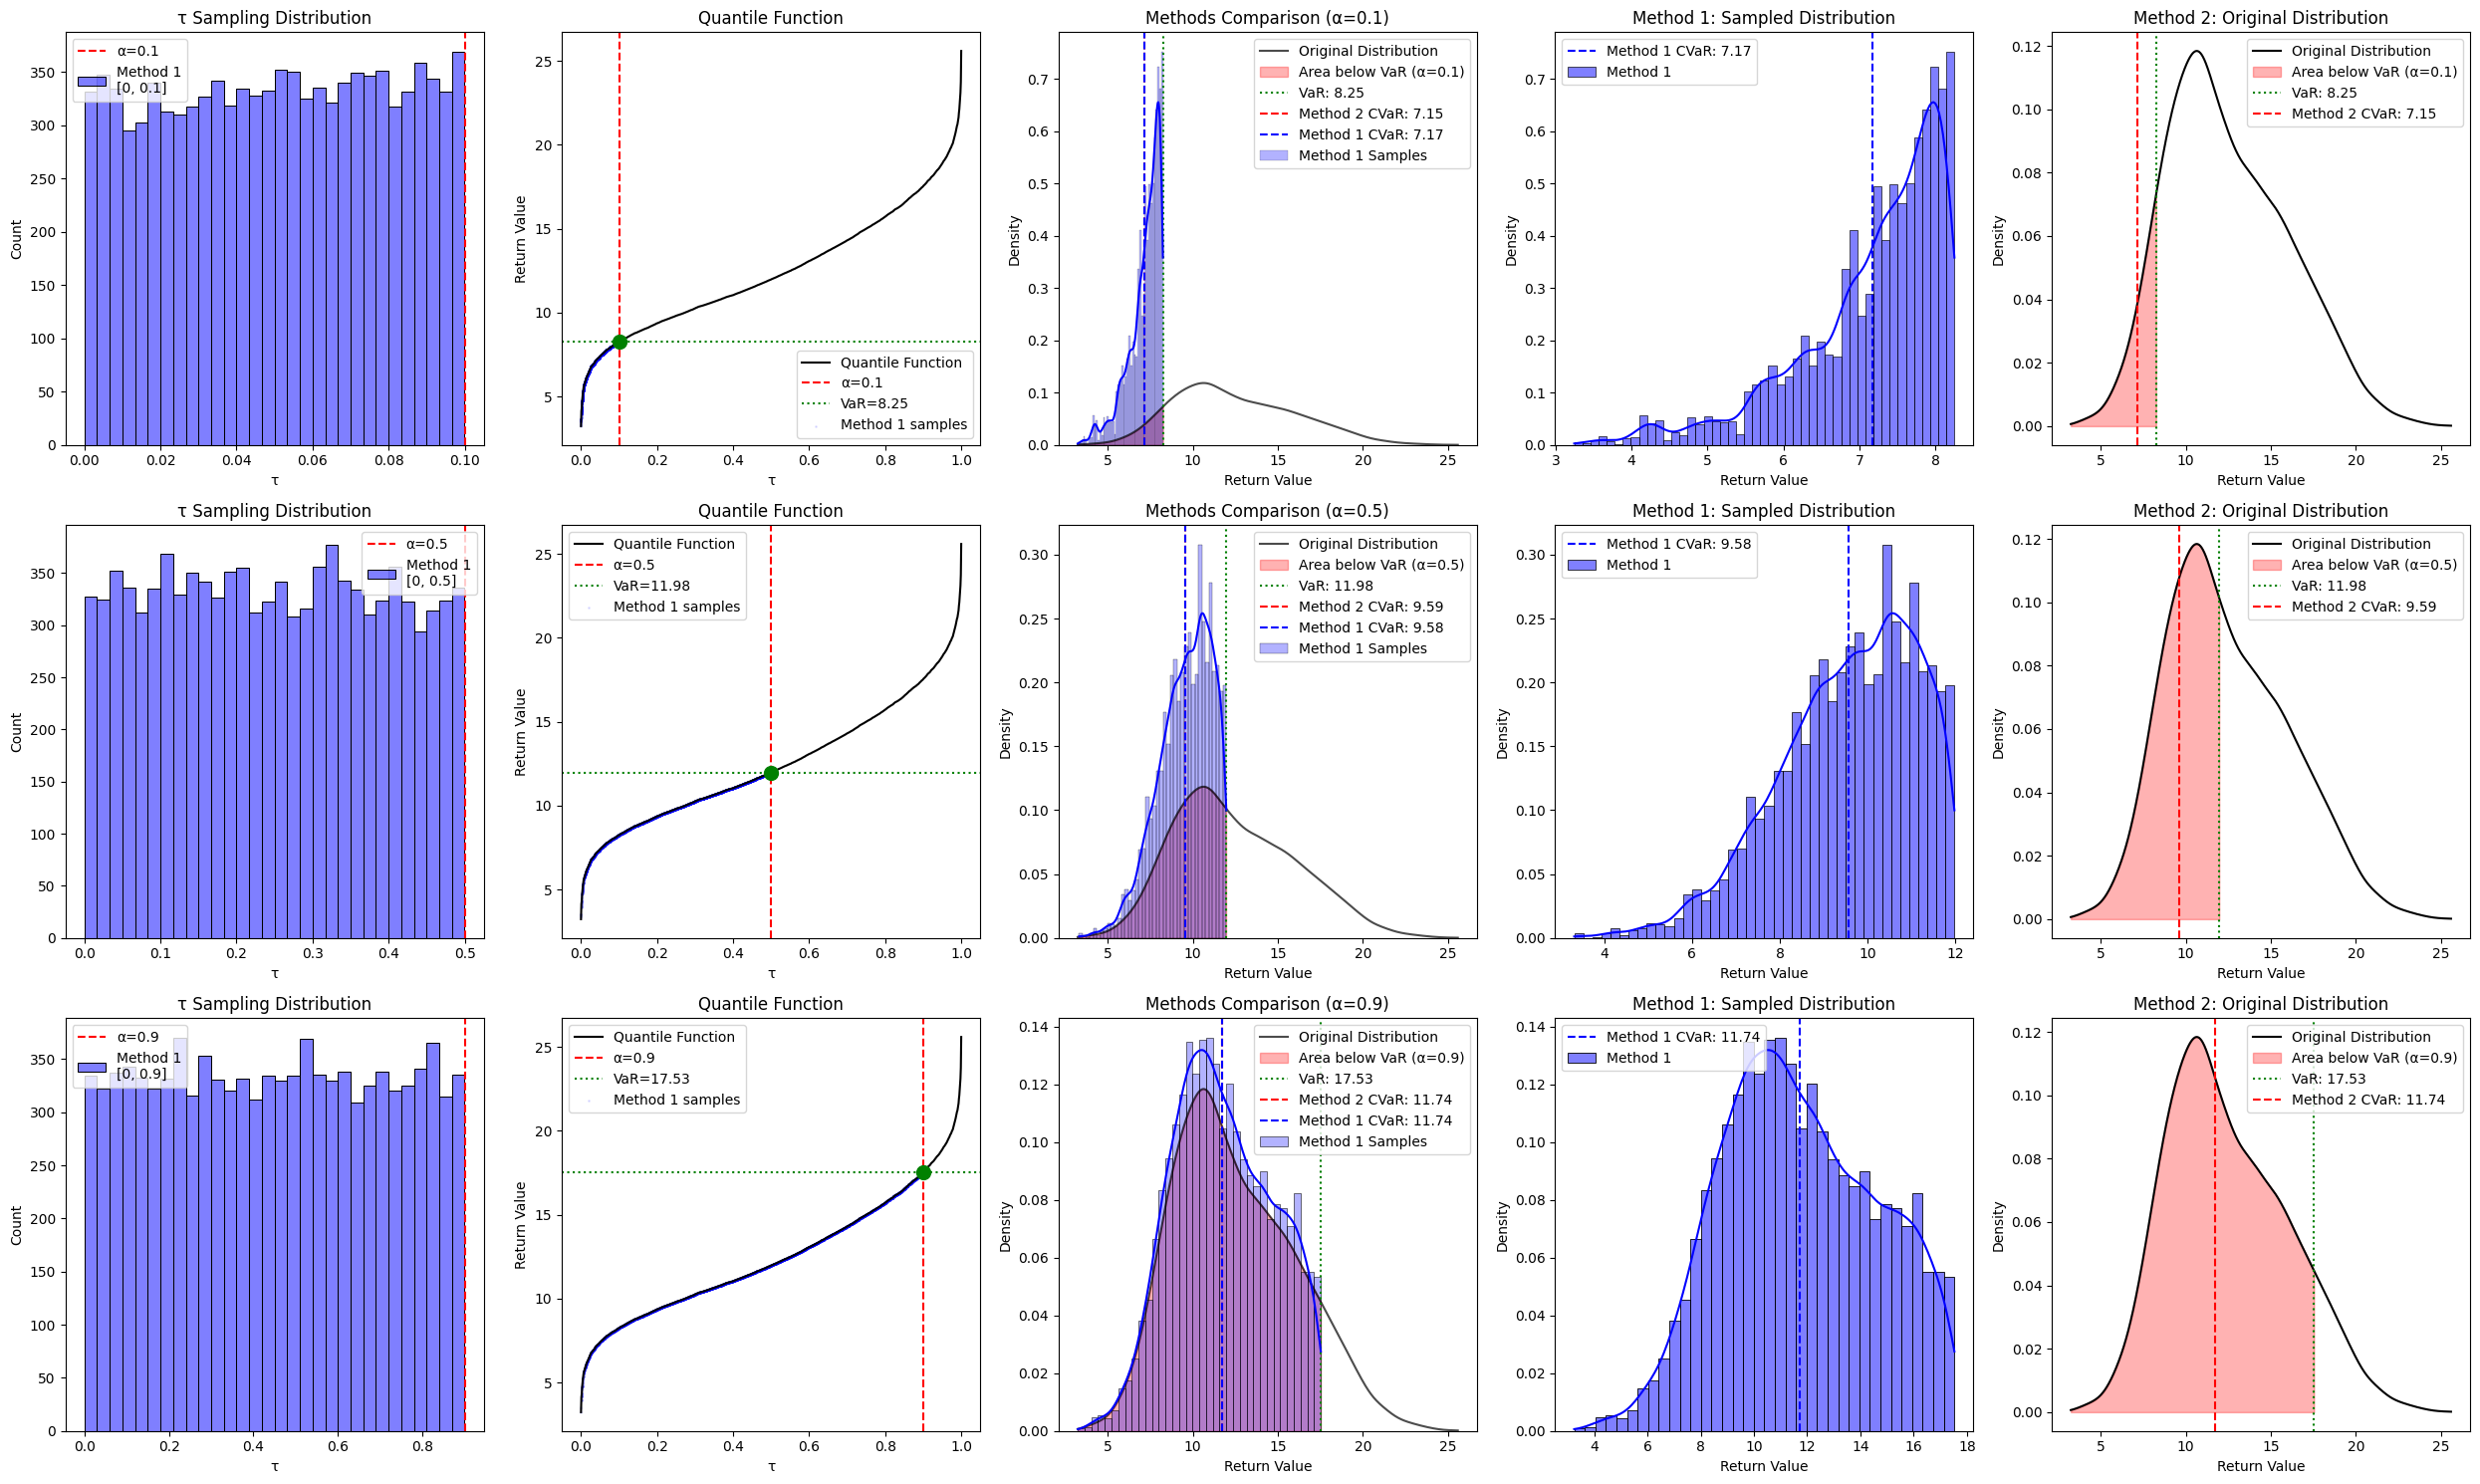


Numerical comparison results:

α = 0.1
Method 1 (Sampling): 7.088 ± 0.010
Method 2 (Traditional): 7.084
Absolute difference: 0.003502

α = 0.5
Method 1 (Sampling): 9.533 ± 0.014
Method 2 (Traditional): 9.535
Absolute difference: 0.001736

α = 0.9
Method 1 (Sampling): 11.758 ± 0.027
Method 2 (Traditional): 11.756
Absolute difference: 0.001963


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def generate_value_distribution(n_samples=10000):
    """
    Generate a mixed distribution for testing
    """
    returns = np.concatenate([
        np.random.normal(10, 2, n_samples // 2),  # Conservative outcomes
        np.random.normal(15, 3, n_samples // 2)   # Risky outcomes
    ])
    return np.sort(returns)

def calculate_cvar_method1(returns, alpha, n_samples=10000):
    """
    Method 1: Direct sampling from [0, α]
    """
    taus = np.random.uniform(0, alpha, n_samples)
    sampled_returns = np.percentile(returns, taus * 100)
    cvar = np.mean(sampled_returns)
    return cvar, taus, sampled_returns
    
def calculate_cvar_method2(returns, alpha, n_samples=10000):
    """
    Method 2: Traditional CVaR calculation
    1. Calculate VaR on original distribution
    2. Calculate mean of values below VaR
    """
    # Calculate VaR
    var = np.percentile(returns, alpha * 100)
    
    # Calculate CVaR as mean of values below VaR
    cvar_values = returns[returns <= var]
    cvar = np.mean(cvar_values)
    
    # For visualization purposes, also return the VaR and values below it
    return cvar, var, cvar_values


def visualize_equivalence():
    """
    Visualize methods comparison with tau sampling and quantile function
    """
    returns = generate_value_distribution()
    alphas = [0.1, 0.5, 0.9]
    
    # Create figure with 5 columns for each alpha
    fig, axes = plt.subplots(len(alphas), 5, figsize=(25, 15))
    
    for idx, alpha in enumerate(alphas):
        # Calculate CVaR using both methods
        cvar1, taus1, returns1 = calculate_cvar_method1(returns, alpha)
        cvar2, var2, values2 = calculate_cvar_method2(returns, alpha)
        
        # Calculate KDE for original distribution
        x = np.linspace(min(returns), max(returns), 1000)
        kde = stats.gaussian_kde(returns)
        y = kde(x)
        
        # Plot 1: Tau sampling distribution
        ax1 = axes[idx, 0]
        sns.histplot(data=taus1, bins=30, color='blue', alpha=0.5, 
                    label=f'Method 1\n[0, {alpha}]', ax=ax1)
        ax1.axvline(alpha, color='red', linestyle='--', label=f'α={alpha}')
        ax1.set_title(f'τ Sampling Distribution')
        ax1.set_xlabel('τ')
        ax1.set_ylabel('Count')
        ax1.legend()
        
        # Plot 2: Quantile Function
        ax2 = axes[idx, 1]
        taus_full = np.linspace(0, 1, 1000)
        quantiles_full = np.percentile(returns, taus_full * 100)
        
        # Plot full quantile function
        ax2.plot(taus_full, quantiles_full, 'k-', label='Quantile Function')
        
        # Highlight area and point for VaR
        ax2.axvline(x=alpha, color='red', linestyle='--', label=f'α={alpha}')
        ax2.axhline(y=var2, color='green', linestyle=':', label=f'VaR={var2:.2f}')
        ax2.plot(alpha, var2, 'go', markersize=10)
        
        # Plot sampled points from Method 1
        ax2.scatter(taus1, returns1, color='blue', alpha=0.1, s=1, label='Method 1 samples')
        
        ax2.set_title('Quantile Function')
        ax2.set_xlabel('τ')
        ax2.set_ylabel('Return Value')
        ax2.legend()
        
        # Plot 3: Methods Comparison (Original)
        ax3 = axes[idx, 2]
        
        # Plot original distribution
        ax3.plot(x, y, 'k-', label='Original Distribution', alpha=0.7)
        
        # Method 2: Highlight area below VaR
        x_fill = x[x <= var2]
        y_fill = y[x <= var2]
        ax3.fill_between(x_fill, y_fill, color='red', alpha=0.3, 
                        label=f'Area below VaR (α={alpha})')
        
        # Method 2: Add VaR and CVaR lines
        ax3.axvline(var2, color='green', linestyle=':', 
                   label=f'VaR: {var2:.2f}')
        ax3.axvline(cvar2, color='red', linestyle='--', 
                   label=f'Method 2 CVaR: {cvar2:.2f}')
        
        # Method 1: Plot sampled distribution and CVaR
        sns.histplot(data=returns1, stat='density', kde=True,
                    color='blue', alpha=0.3, label='Method 1 Samples',
                    ax=ax3)
        ax3.axvline(cvar1, color='blue', linestyle='--', 
                   label=f'Method 1 CVaR: {cvar1:.2f}')
        
        ax3.set_title(f'Methods Comparison (α={alpha})')
        ax3.set_xlabel('Return Value')
        ax3.set_ylabel('Density')
        ax3.legend()
        
        # Plot 4: Method 1 Focus
        ax4 = axes[idx, 3]
        sns.histplot(data=returns1, stat='density', kde=True,
                    color='blue', alpha=0.5, label='Method 1', ax=ax4)
        ax4.axvline(cvar1, color='blue', linestyle='--', 
                   label=f'Method 1 CVaR: {cvar1:.2f}')
        ax4.set_title('Method 1: Sampled Distribution')
        ax4.set_xlabel('Return Value')
        ax4.set_ylabel('Density')
        ax4.legend()
        
        # Plot 5: Method 2 Focus
        ax5 = axes[idx, 4]
        ax5.plot(x, y, 'k-', label='Original Distribution')
        x_fill = x[x <= var2]
        y_fill = y[x <= var2]
        ax5.fill_between(x_fill, y_fill, color='red', alpha=0.3, 
                        label=f'Area below VaR (α={alpha})')
        ax5.axvline(var2, color='green', linestyle=':', 
                   label=f'VaR: {var2:.2f}')
        ax5.axvline(cvar2, color='red', linestyle='--', 
                   label=f'Method 2 CVaR: {cvar2:.2f}')
        ax5.set_title('Method 2: Original Distribution')
        ax5.set_xlabel('Return Value')
        ax5.set_ylabel('Density')
        ax5.legend()
    
    plt.tight_layout()
    plt.show()


def numerical_comparison():
    """
    Perform numerical comparison of both methods
    """
    returns = generate_value_distribution()
    alphas = [0.1, 0.5, 0.9]
    n_trials = 100
    
    results = []
    for alpha in alphas:
        cvar1_values = []
        cvar2_values = []
        
        # For Method 1 (stochastic), do multiple trials
        for _ in range(n_trials):
            cvar1, _, _ = calculate_cvar_method1(returns, alpha)
            cvar1_values.append(cvar1)
        
        # For Method 2 (deterministic), one calculation is enough
        cvar2, _, _ = calculate_cvar_method2(returns, alpha)
        
        results.append({
            'alpha': alpha,
            'method1_mean': np.mean(cvar1_values),
            'method1_std': np.std(cvar1_values),
            'method2': cvar2,
            'difference': abs(np.mean(cvar1_values) - cvar2)
        })
    
    return results

if __name__ == "__main__":
    np.random.seed(42)
    
    print("Visualizing CVaR calculation methods...")
    visualize_equivalence()
    
    print("\nNumerical comparison results:")
    results = numerical_comparison()
    for result in results:
        print(f"\nα = {result['alpha']}")
        print(f"Method 1 (Sampling): {result['method1_mean']:.3f} ± {result['method1_std']:.3f}")
        print(f"Method 2 (Traditional): {result['method2']:.3f}")
        print(f"Absolute difference: {result['difference']:.6f}")


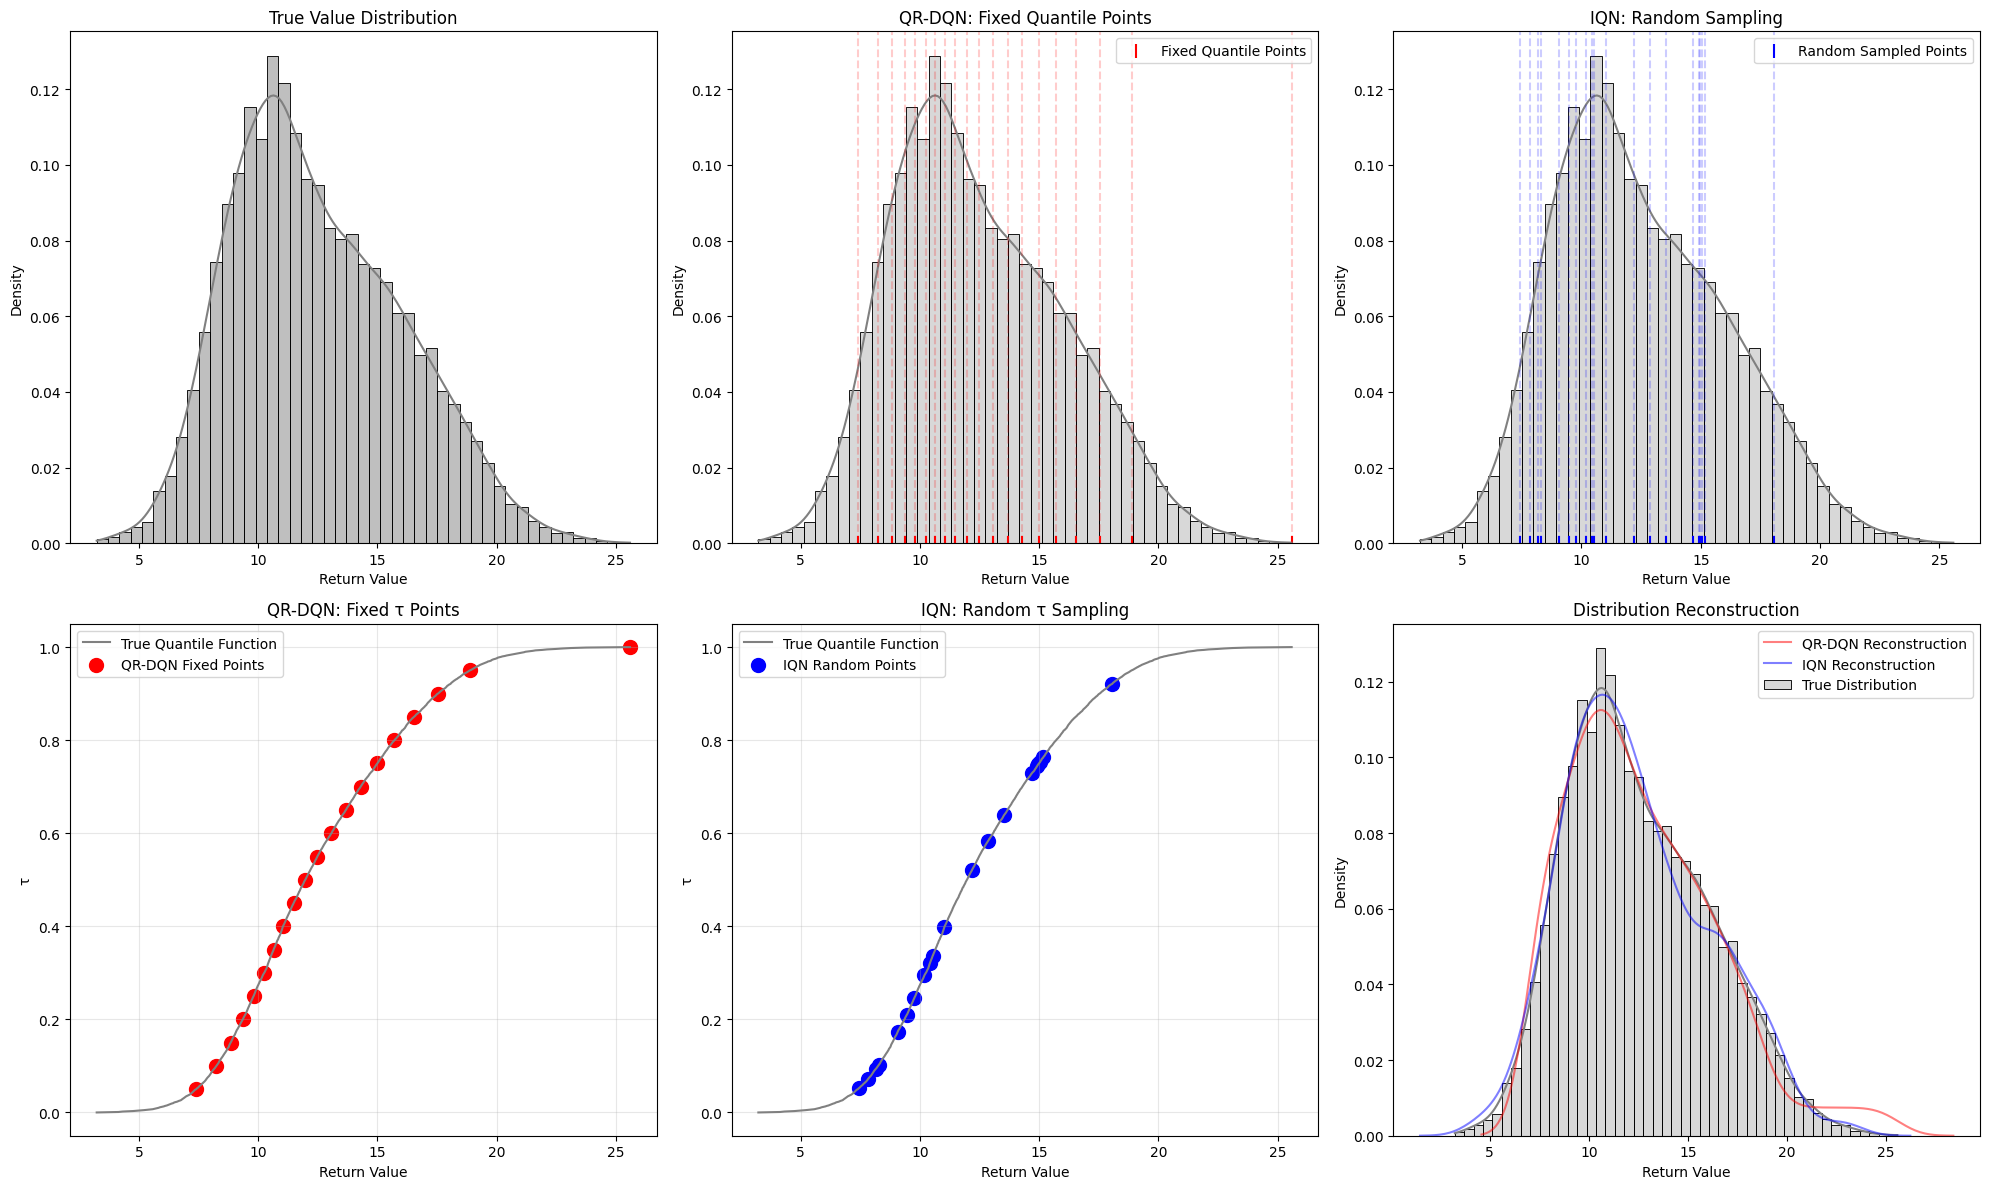

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def generate_true_distribution(n_samples=10000):
    """
    Generate a mixed distribution to demonstrate approximation
    """
    returns = np.concatenate([
        np.random.normal(10, 2, n_samples // 2),  # Some returns around 10
        np.random.normal(15, 3, n_samples // 2)   # Some returns around 15
    ])
    return np.sort(returns)

def approximate_qrdqn(returns, N=20):
    """
    QR-DQN: Fixed quantile points
    N: number of quantile points
    """
    taus = np.linspace(0, 1, N+1)[1:]  # N fixed quantile points
    quantiles = np.percentile(returns, taus * 100)
    return taus, quantiles

def approximate_iqn(returns, n_samples=1000):
    """
    IQN: Random sampling of tau
    """
    taus = np.random.uniform(0, 1, n_samples)
    taus = np.sort(taus)
    quantiles = np.percentile(returns, taus * 100)
    return taus, quantiles

def visualize_comparison():
    """
    Visualize how IQN and QR-DQN approximate value distributions
    """
    returns = generate_true_distribution()
    
    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # Plot 1: True Distribution
    ax = axes[0, 0]
    sns.histplot(data=returns, stat='density', kde=True,
                color='gray', alpha=0.5, ax=ax)
    ax.set_title('True Value Distribution')
    ax.set_xlabel('Return Value')
    ax.set_ylabel('Density')
    
    # Plot 2: QR-DQN Approximation (Fixed Points)
    ax = axes[0, 1]
    taus_qr, quantiles_qr = approximate_qrdqn(returns, N=20)
    
    # Plot true distribution
    sns.histplot(data=returns, stat='density', kde=True,
                color='gray', alpha=0.3, ax=ax)
    
    # Plot fixed quantile points
    ax.scatter(quantiles_qr, np.zeros_like(quantiles_qr), 
              color='red', s=100, marker='|',
              label='Fixed Quantile Points')
    
    # Add vertical lines to show fixed points
    for q in quantiles_qr:
        ax.axvline(q, color='red', alpha=0.2, linestyle='--')
    
    ax.set_title('QR-DQN: Fixed Quantile Points')
    ax.set_xlabel('Return Value')
    ax.set_ylabel('Density')
    ax.legend()
    
    # Plot 3: IQN Approximation (Random Sampling)
    ax = axes[0, 2]
    taus_iqn, quantiles_iqn = approximate_iqn(returns, n_samples=20)
    
    # Plot true distribution
    sns.histplot(data=returns, stat='density', kde=True,
                color='gray', alpha=0.3, ax=ax)
    
    # Plot random sampled points
    ax.scatter(quantiles_iqn, np.zeros_like(quantiles_iqn), 
              color='blue', s=100, marker='|',
              label='Random Sampled Points')
    
    # Add vertical lines to show sampled points
    for q in quantiles_iqn:
        ax.axvline(q, color='blue', alpha=0.2, linestyle='--')
    
    ax.set_title('IQN: Random Sampling')
    ax.set_xlabel('Return Value')
    ax.set_ylabel('Density')
    ax.legend()
    
    # Plot 4: Quantile Function with QR-DQN points
    ax = axes[1, 0]
    # Full quantile function
    taus_full = np.linspace(0, 1, 1000)
    quantiles_full = np.percentile(returns, taus_full * 100)
    ax.plot(quantiles_full, taus_full, 'gray', label='True Quantile Function')
    
    # Plot QR-DQN points
    ax.scatter(quantiles_qr, taus_qr, color='red', s=100,
              label='QR-DQN Fixed Points')
    
    ax.set_title('QR-DQN: Fixed τ Points')
    ax.set_xlabel('Return Value')
    ax.set_ylabel('τ')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Plot 5: Quantile Function with IQN points
    ax = axes[1, 1]
    ax.plot(quantiles_full, taus_full, 'gray', label='True Quantile Function')
    
    # Plot IQN points
    ax.scatter(quantiles_iqn, taus_iqn, color='blue', s=100,
              label='IQN Random Points')
    
    ax.set_title('IQN: Random τ Sampling')
    ax.set_xlabel('Return Value')
    ax.set_ylabel('τ')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Plot 6: Distribution Reconstruction Comparison
    ax = axes[1, 2]
    
    # True distribution
    sns.histplot(data=returns, stat='density', kde=True,
                color='gray', alpha=0.3, label='True Distribution',
                ax=ax)
    
    # QR-DQN reconstruction (interpolated)
    qrdqn_interpolated = np.interp(taus_full, taus_qr, quantiles_qr)
    sns.kdeplot(data=qrdqn_interpolated, color='red', alpha=0.5,
                label='QR-DQN Reconstruction', ax=ax)
    
    # IQN reconstruction (with more samples)
    _, quantiles_iqn_more = approximate_iqn(returns, n_samples=1000)
    sns.kdeplot(data=quantiles_iqn_more, color='blue', alpha=0.5,
                label='IQN Reconstruction', ax=ax)
    
    ax.set_title('Distribution Reconstruction')
    ax.set_xlabel('Return Value')
    ax.set_ylabel('Density')
    ax.legend()
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    np.random.seed(42)
    visualize_comparison()


# IQN Summary




## Transitioning from QR-DQN to IQN

QR-DQN, while an improvement over C51, utilizes a discrete set of quantiles to depict the return distribution, meaning that the precision of the approximation hinges on the number of quantiles used. Using a greater number of quantiles can enhance accuracy but comes at the cost of increased computational overhead. To tackle this limitation, IQN approximates the full quantile function, a continuous function that maps probabilities to returns. Through learning the full quantile function, IQN gains the ability to represent any distribution over returns, not just a fixed set of quantiles. The accuracy of IQN is limited only by the network's capacity and training. 

IQN utilizes a neural network to approximate the quantile function. This network receives the state-action pair (x, a) and a sample τ from a base distribution, usually a uniform distribution U(), as input. The output of the network is the corresponding quantile value Z<sub>τ</sub>(x, a). This transition to a continuous representation of the quantile function in IQN marks a significant shift from the discretization inherent in QR-DQN. By employing a neural network for this approximation, IQN achieves a higher level of flexibility, accuracy, and efficiency in representing and learning the return distribution. 

IQN uses a distributional Bellman optimality operator to estimate a state-action value distribution. It is important to note that the action used for the next state is the greedy action with respect to the mean of the next state-action value distribution. One of the key features of IQN is its ability to handle risk-sensitive policies. In reinforcement learning, risk refers to the uncertainty surrounding possible outcomes, and risk-sensitive policies are those that depend on more than just the mean of the outcomes. 

IQN allows for the implementation of a wider range of risk-sensitive policies by utilizing non-uniform base distributions for sampling τ. This capability enables the exploration of different risk measures, unlike QR-DQN, which primarily focuses on risk-neutral policies based on expected returns. IQN samples from continuous, independent distributions, which leads to decorrelated sample TD errors.  The estimated action-values in IQN transition from being the true mean of a mixture of n Diracs to a sample mean of the implicit distribution defined by reparameterizing the sampling distribution via the learned quantile function. 
```


Implicit Quantile Networks (IQN) are a powerful distributional reinforcement learning (RL) algorithm designed to learn the full quantile function of the return distribution, as described in the sources. Unlike traditional RL that focuses on expected values, distributional RL models the entire distribution of possible returns, providing a richer representation of uncertainties associated with future rewards. IQN leverages quantile regression, a statistical technique that models the conditional quantiles of a variable, to achieve this goal. 

The core idea behind IQN is to represent the quantile function of the return distribution implicitly using a neural network. This network takes the state-action pair ($x, a$) and a sample $\tau$ from a base distribution, typically the uniform distribution $U([1])$, as input. The network's output is then the quantile value of the return distribution $Z_{\tau}(x, a)$, which can be interpreted as a sample from the implicitly defined return distribution. By sampling multiple $\tau$ values and feeding them through the network, IQN can construct an approximation of the entire return distribution.

To learn the quantile function, IQN uses the Huber quantile regression loss function, which measures the difference between predicted quantiles and target quantiles derived from the Bellman equation. This equation, in its distributional form, is defined as:

$Z^{\pi}(x, a) \stackrel{D}{=} R(x, a) + \gamma Z^{\pi}(X', A')$,

where $\stackrel{D}{=}$ denotes equality in distribution, $R(x, a)$ is the reward function, $\gamma$ is the discount factor, and $X'$ and $A'$ are random variables representing the next state and action, respectively, distributed according to the transition dynamics and the policy $\pi$. 

During training, IQN samples multiple $\tau$ and $\tau'$ values from $U([1])$. For each pair ($\tau, \tau'$), the sampled temporal difference (TD) error is computed as:

$\delta^{t}_{\tau,\tau'} = r_t + \gamma Z_{\tau'}(x_{t+1}, \pi_{\beta}(x_{t+1})) - Z_{\tau}(x_{t}, a_{t})$,

where $r_t$ is the reward at time step $t$. These TD errors are then plugged into the Huber loss function to update the network parameters. 

One of the key advantages of IQN is its ability to incorporate risk-sensitive policies by using distortion risk measures. These measures reweight the cumulative probabilities of different outcomes, reflecting the agent's risk appetite. For example, a risk-averse agent would prioritize avoiding negative outcomes, even if it means sacrificing potential rewards. IQN achieves this by modifying the sampling distribution of $\tau$ based on the chosen distortion risk measure. Examples of such measures include cumulative probability weighting (CPW) from cumulative prospect theory, Wang's distortion risk measure, power distortion (Pow), and conditional value-at-risk (CVaR).

By learning the full quantile function and incorporating risk sensitivity, IQN surpasses the performance of previous quantile-based methods like QR-DQN on the Atari-57 benchmark. It demonstrates improved approximation accuracy, enhanced data efficiency, and greater flexibility in handling risk. The sources highlight that IQN achieves significant performance gains, nearly matching the performance of Rainbow, a state-of-the-art distributional RL agent that combines multiple advanced techniques. Notably, IQN even outperforms Rainbow in the most challenging Atari games where existing RL agents struggle to surpass human players. 


# IQN Loss Explained



The loss function in IQN is a crucial component that enables learning the quantile function effectively. The Huber quantile regression loss, denoted as $\rho_{\kappa}^{\tau}$, combines the robustness of the Huber loss with quantile regression principles:

$\rho_{\kappa}^{\tau}(\delta) = |\tau - \mathbb{1}_{\{\delta < 0\}}| \cdot \mathcal{L}_{\kappa}(\delta)$

where:
- $\delta$ is the temporal difference error
- $\tau$ is the quantile level (sampled from uniform distribution)
- $\kappa$ is the threshold parameter (typically set to 1)
- $\mathbb{1}_{\{\delta < 0\}}$ is the indicator function that equals 1 when $\delta < 0$ and 0 otherwise
- $\mathcal{L}_{\kappa}$ is the Huber loss function

The Huber loss $\mathcal{L}_{\kappa}$ is defined as:

$\mathcal{L}_{\kappa}(\delta) = \begin{cases}
\frac{1}{2}\delta^2 & \text{if } |\delta| \leq \kappa \\
\kappa(|\delta| - \frac{1}{2}\kappa) & \text{otherwise}
\end{cases}$

This composite loss function serves several purposes:

1. Asymmetric Weighting:
   - The term $|\tau - \mathbb{1}_{\{\delta < 0\}}|$ creates asymmetric penalties
   - Overestimation is penalized with weight $\tau$
   - Underestimation is penalized with weight $(1-\tau)$
   - This ensures proper learning of different quantiles of the return distribution

2. Robustness to Outliers:
   - The Huber loss $\mathcal{L}_{\kappa}$ combines quadratic and linear regions
   - Quadratic for small errors ($|\delta| \leq \kappa$): provides smooth gradients
   - Linear for large errors ($|\delta| > \kappa$): reduces impact of outliers
   - The threshold $\kappa$ controls the transition between these regions

The total loss for a batch of transitions is computed by averaging over multiple sampled quantile levels:

$\mathcal{L} = \frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{N'}\rho_{\kappa}^{\tau_i}(\delta_{\tau_i,\tau'_j})$

where:
- $N$ is the number of $\tau$ samples for the current state-action
- $N'$ is the number of $\tau'$ samples for the next state
- $\delta_{\tau_i,\tau'_j}$ is the TD error between quantiles $\tau_i$ and $\tau'_j$

This averaging over multiple quantile levels ensures:
1. Better approximation of the entire return distribution
2. Reduced variance in gradient estimates
3. Improved stability during training

The gradients of this loss function with respect to the network parameters provide the learning signal that shapes the implicit quantile function approximation. Through iterative optimization, the network learns to map state-action pairs and quantile levels to their corresponding return quantiles, effectively capturing the full distribution of possible outcomes.

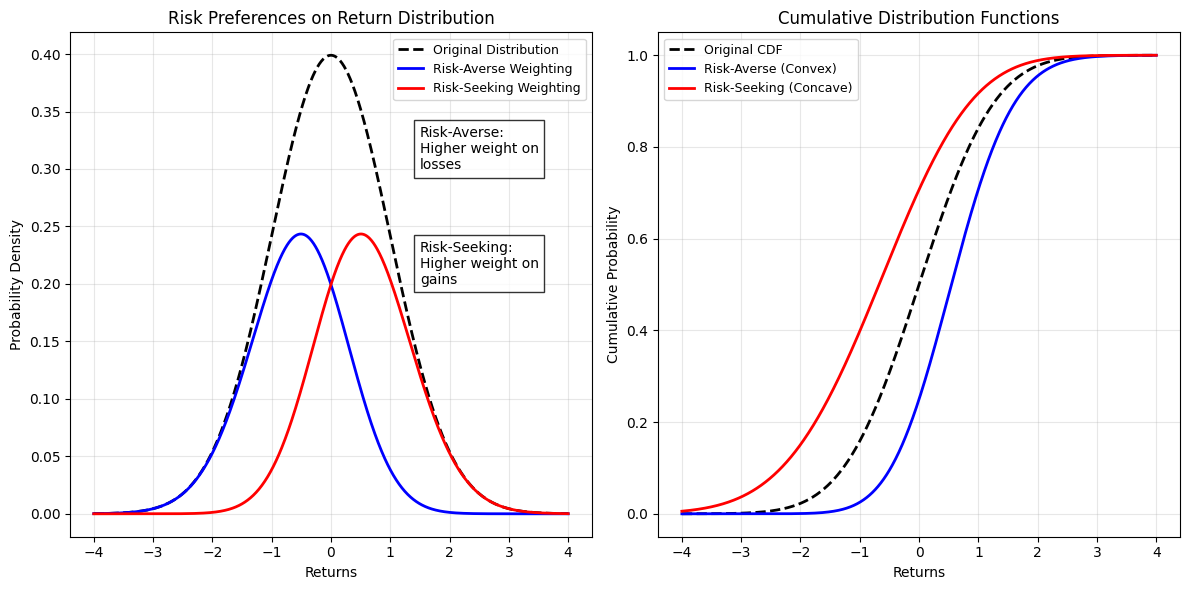

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_risk_distributions(mu=0, sigma=1, figsize=(12, 6)):
    # Create data points
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    
    # Calculate distributions
    normal_dist = norm.pdf(x, mu, sigma)
    
    # Create risk-averse and risk-seeking weightings
    # Risk-averse gives more weight to negative outcomes
    risk_averse = normal_dist * (1 - norm.cdf(x, mu, sigma))
    # Risk-seeking gives more weight to positive outcomes
    risk_seeking = normal_dist * norm.cdf(x, mu, sigma)
    
    # Create subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Plot 1: Original vs Weighted Distributions
    ax1.plot(x, normal_dist, 'k--', label='Original Distribution', linewidth=2)
    ax1.plot(x, risk_averse, 'b-', label='Risk-Averse Weighting', linewidth=2)
    ax1.plot(x, risk_seeking, 'r-', label='Risk-Seeking Weighting', linewidth=2)
    
    ax1.set_title('Risk Preferences on Return Distribution', fontsize=12)
    ax1.set_xlabel('Returns', fontsize=10)
    ax1.set_ylabel('Probability Density', fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=9)
    
    # Plot 2: Cumulative Distributions
    ax2.plot(x, norm.cdf(x, mu, sigma), 'k--', 
            label='Original CDF', linewidth=2)
    # Risk-averse distortion (convex)
    risk_averse_cdf = norm.cdf(x, mu, sigma)**2
    # Risk-seeking distortion (concave)
    risk_seeking_cdf = np.sqrt(norm.cdf(x, mu, sigma))
    
    ax2.plot(x, risk_averse_cdf, 'b-', 
            label='Risk-Averse (Convex)', linewidth=2)
    ax2.plot(x, risk_seeking_cdf, 'r-', 
            label='Risk-Seeking (Concave)', linewidth=2)
    
    ax2.set_title('Cumulative Distribution Functions', fontsize=12)
    ax2.set_xlabel('Returns', fontsize=10)
    ax2.set_ylabel('Cumulative Probability', fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=9)
    
    # Add annotations
    ax1.text(1.5, 0.3, 'Risk-Averse:\nHigher weight on\nlosses', 
             bbox=dict(facecolor='white', alpha=0.8))
    ax1.text(1.5, 0.2, 'Risk-Seeking:\nHigher weight on\ngains', 
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_risk_distributions()

# Optional: Save the plot
# plt.savefig('risk_distributions.png', dpi=300, bbox_inches='tight')